## Reformat images.s, look for the images

In [26]:
import cry_rgb as cry
from PIL import Image, ImageColor
import numpy as np
from ascii_magic import AsciiArt

def get1BitPixels(cry_pixels,width=2):
    rgb_pixels = []
    for b in cry_pixels:
        for m in [128,64,32,16,8,4,2,1]:
            rgb_pixels += [(255,255,255) if (b & m) else (0,0,0)]
    pad_len = width - (len(rgb_pixels) % width)
    rgb_pixels += [(0,0,0)] * pad_len
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

def getPixels(cry_pixels,width=2):
    rgb_pixels = []
    for i in range(0, len(cry_pixels),2):
        t = cry_pixels[i:i+2]
        #print(i,t,int.from_bytes(t,'little'))
        rgb = cry.cry_to_rgb(int.from_bytes(t,'big'))
        rgb_pixels += [rgb]
    pad_len = width - (len(rgb_pixels) % width)
    rgb_pixels += [(0,0,0)] * pad_len
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels


In [10]:
vlm_logo = """
                dc.l $E00040, $F00000, $100001, $C0002, $140000, $8F0003
                dc.l $80004, $C0005, $100000, $8F0004, $C0006, $140005
                dc.l $100000, $8F0006, $140007, $C0005, $100000, $8F0007
                dc.l $C0008, $140005, $100000, 9, $14000A, $8000C, $C0000
                dc.l $A, $8000D, $10000C, $C0000, $B, $14000A, $8000D
                dc.l $100000, 0
                dc.l $800000, $400080, $A00000, $E00000, $A00080, $E00040
                dc.l $1200040, $1200080, $1400000, $1800040, $1C00000
                dc.l $1400080, $1C00080, 0
                dc.l $80008, $39803F8, $4000408, $4100118
                dc.l $1180118,$1180118,$1180118,$1180118,$1180118
                dc.l $1180118,$1180118,$1180118,$1180118,$1180118
                dc.l $1180118,$1180118,$1180118
                dc.l $1180130, $1380140, $1480150, $1580160, $1680170
                dc.l $1780180, $1880190, $19801A0, $1A801B0, $1B801C0
                dc.l $1C801D0, $1D801E0, $1E801F0, $3A00118, $1280118
                dc.l $1200118, $11802C8, $2D002D8, $2E002E8, $2F002F8
                dc.l $3000308, $3100318, $3200328, $3300338, $3400348
                dc.l $3500358, $3600368, $3700378, $3800388, $3900118
                dc.l $1180118,$1180118
                dc.l $11801F8, $2000208, $2100218, $2200228, $2300238
                dc.l $2400248, $2500258, $2600268, $2700278, $2800288
                dc.l $2900298, $2A002A8, $2B002B8, $2C00118
                dc.l $1180118,$1180118
                dc.l $3A803B0, $3B803C0, $3C803D0, $3D803E0, $3E803F0
                dc.l 0,0
                dc.l $20100804
                dc.l $4081020,$4081020
                dc.l $20100804, $20202020, $20000020, $50505000, 0
                dc.l $4848FE48, $48FE4848, $107E9070, $1014FE20, $60620408
                dc.l $10204C8C, $20508870, $64989A64, $102040, 0
                dc.l $10204040, $40402010, $20100808, $8081020, $925438
                dc.l $38549200, $101010FE, $10101000, 0
                dc.l $101020, $FE
                dc.l 0,0
                dc.l $606000, $20408, $10204080, $7C82868A, $92A2C27C
                dc.l $10305010, $101010FE, $78840408, $102040FE, $7C820204
                dc.l $7C02827C, $40C1424, $4484FE04, $FE8080FC, $202827C
                dc.l $384080FC, $8282827C, $FE020408, $10204080, $7C82827C
                dc.l $8282827C, $7C828282, $7E02827C, $7C, $27E827E, $808080FC
                dc.l $828282FC, $7E, $8080807E, $202027E, $8282827E, $7C
                dc.l $82FC807C, $3E4040, $FE404040, $7E, $827E027C, $808080FC
                dc.l $82828282, $100030, $10101038, $100010, $101010E0
                dc.l $80808088, $90F08884, $60202020, $20202070, $7C, $92929282
                dc.l $78, $84848484, $7C, $8282827C, $FC, $82FC8080, $7E
                dc.l $827E0202, $FC, $82808080, $7E, $403804FC, $10FE
                dc.l $1010100C, $82, $8282867A, $82, $82442810, $82, $8292AAC6
                dc.l $84, $48304884, $82, $827E02FC, $FE, $41040FE, $10284482
                dc.l $FE828282, $FC8284FC, $828282FC, $7EC08080, $8080C07E
                dc.l $FC868282, $828286FC, $FE8080FE, $808080FE, $FE8080FE
                dc.l $80808080, $7EC08080, $8086C27C, $828282FE, $82828282
                dc.l $FE101010, $101010FE, $FE080808, $8888870, $848890E0
                dc.l $90888482, $80808080, $808080FE, $82C6AA92, $82828282
                dc.l $82C2A292, $8A868282, $7CC68282, $8282C67C, $FC828282
                dc.l $FC808080, $7CC68282, $828AC67A, $FC828282, $FC888482
                dc.l $7E80C030, $1C0602FC, $FE101010, $10101010, $82828282
                dc.l $8282827C, $82828244, $44282810, $82828282, $8292AAC6
                dc.l $82824438, $28448282, $82828244, $28101010, $FE020408
                dc.l $102040FE, $C0F0FCFE, $FEFCF0C0, $3000, $300000, $3C6666
                dc.l $66663C00, $381818, $18183C00, $386C0C, $18307C00
                dc.l $7E060C, $6663C00, $1C3C6C, $7E0C0C00, $7E607C, $6067C00
                dc.l $3C607C, $66663C00, $3E060C, $18181800, $3C663C, $66663C00
                dc.l $3C663E, $6063C00
                dc.l $FFFFFFFF,$FFFFFFFF
                dc.l $FF8F8F8F, $8F8F8FFF, $FFF1F1F1, $F1F1F1FF, $FF818181
                dc.l $818181FF
"""

In [12]:
flatten = lambda l: [ e for sublist in l for e in sublist]

longs = [l.strip().replace('$','').rjust(8,'0')
         for l in ','.join([l[21:] 
         for l in vlm_logo.split('\n')[1:]]).split(',')]
bytes = flatten([["$"+l[:2],"$"+l[2:4],"$"+l[4:6],"$"+l[6:]] for l in longs])
bytes = ["$00","$08"] + bytes
for i in range(0,len(bytes),8):
    print("dc.b  " + ','.join(bytes[i:i+8]) + f" ; {hex(i)}")

dc.b  $00,$08,$00,$E0,$00,$40,$00,$F0 ; 0x0
dc.b  $00,$00,$00,$10,$00,$01,$00,$0C ; 0x8
dc.b  $00,$02,$00,$14,$00,$00,$00,$8F ; 0x10
dc.b  $00,$03,$00,$08,$00,$04,$00,$0C ; 0x18
dc.b  $00,$05,$00,$10,$00,$00,$00,$8F ; 0x20
dc.b  $00,$04,$00,$0C,$00,$06,$00,$14 ; 0x28
dc.b  $00,$05,$00,$10,$00,$00,$00,$8F ; 0x30
dc.b  $00,$06,$00,$14,$00,$07,$00,$0C ; 0x38
dc.b  $00,$05,$00,$10,$00,$00,$00,$8F ; 0x40
dc.b  $00,$07,$00,$0C,$00,$08,$00,$14 ; 0x48
dc.b  $00,$05,$00,$10,$00,$00,$00,$00 ; 0x50
dc.b  $00,$09,$00,$14,$00,$0A,$00,$08 ; 0x58
dc.b  $00,$0C,$00,$0C,$00,$00,$00,$00 ; 0x60
dc.b  $00,$0A,$00,$08,$00,$0D,$00,$10 ; 0x68
dc.b  $00,$0C,$00,$0C,$00,$00,$00,$00 ; 0x70
dc.b  $00,$0B,$00,$14,$00,$0A,$00,$08 ; 0x78
dc.b  $00,$0D,$00,$10,$00,$00,$00,$00 ; 0x80
dc.b  $00,$00,$00,$80,$00,$00,$00,$40 ; 0x88
dc.b  $00,$80,$00,$A0,$00,$00,$00,$E0 ; 0x90
dc.b  $00,$00,$00,$A0,$00,$80,$00,$E0 ; 0x98
dc.b  $00,$40,$01,$20,$00,$40,$01,$20 ; 0xa0
dc.b  $00,$80,$01,$40,$00,$00,$01,$80 ; 0xa8
dc.b  $00,$4

## square

dc.b  $00,$04,$01,$00,$01,$00,$00,$04 ; 0x0
dc.b  $00,$01,$00,$00,$00,$02,$00,$04 ; 0x8
dc.b  $00,$00,$00,$10,$00,$00,$00,$04 ; 0x10
dc.b  $00,$02,$00,$04,$00,$04,$00,$08 ; 0x18
dc.b  $00,$00,$00,$10,$00,$00,$00,$04 ; 0x20
dc.b  $00,$04,$00,$08,$00,$03,$00,$0C ; 0x28
dc.b  $00,$00,$00,$10,$00,$00,$00,$04 ; 0x30
dc.b  $00,$03,$00,$0C,$00,$01,$00,$00 ; 0x38
dc.b  $00,$00,$00,$10,$00,$00,$01,$00 ; 0x40
dc.b  $01,$00,$00,$00,$00,$00,$02,$00 ; 0x48
dc.b  $00,$00,$00,$00,$02,$00,$02,$00 ; 0x50
dc.b  $02,$00 ; 0x58

;   _!-       -*-   -t
; _I__      -       _e
;  .  `r`  `I-  .;.   
;     .=. ."    -{`   
; `)`  `?-`x` `   `i` 
; `<`,  .    -I`  .). 
;   `*-        /. -{` 
; ``   .ic!-  `c`  :  
; a[.   iv_ `c`       
;   ""_{.   ./.   /". 
;  `{{-,        -]?{`.
;        '       `  -[
;   -{- -}-           
;   .;.    -I-      . 
;           ;  `v` -I_
;          -!- .\.    



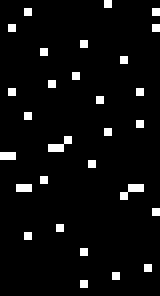

In [61]:
img_data = """
                dc.l $40100, $1000004, $10000, $20004, $10, $04, $20004
                dc.l $40008, $10, $04, $40008, $3000C, $10, $04, $3000C, $10000
                dc.l $10, $100, $1000000, $200, 0, $2000200
"""
flatten = lambda l: [ e for sublist in l for e in sublist]

longs = [l.strip().replace('$','').rjust(8,'0')
         for l in ','.join([l[21:] 
         for l in img_data.split('\n')[1:-1]]).split(',')]
bytes = flatten([["$"+l[:2],"$"+l[2:4],"$"+l[4:6],"$"+l[6:]] for l in longs])
bytes = bytes + ["$02","$00"]
for i in range(0,len(bytes),8):
    print("dc.b  " + ','.join(bytes[i:i+8]) + f" ; {hex(i)}")
    
width = 20
cry_bytes = bytearray([int(x[1:],16) for x in bytes])
pixels = get1BitPixels(cry_bytes,width)

scale = 8
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=20, monochrome=True)
print('\n'+''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))
img

## chev4

dc.b  $00,$02,$00,$50,$00,$60,$00,$12
dc.b  $00,$00,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$13
dc.b  $00,$03,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$00
dc.b  $00,$C0,$00,$50,$00,$00,$00,$50
dc.b  $00,$80,$00,$A0,$00,$C0

; .\)._],]_    -I-  .\
; `Iq: -.'          `s
;   - `v`   -!-   `   
;  -!-.< -  :,   -!-  
;       [h'`![`     .=
;       =; .+ -I-   -I
;    -!.   -l` '      
;     'v_cet       ` -
;      |-<;`'-l`  -?,[
;    `[!`.!,]'|.      



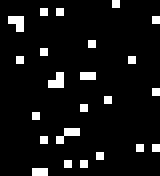

In [64]:
img_data = """
                dc.l $500060, $120000, $01, $40002, $80000, $130003, $01, $40002
                dc.l $80000, $C0, $500000, $500080, $A000C0
"""
flatten = lambda l: [ e for sublist in l for e in sublist]

longs = [l.strip().replace('$','').rjust(8,'0')
         for l in ','.join([l[21:] 
         for l in img_data.split('\n')[1:-1]]).split(',')]
bytes = flatten([["$"+l[:2],"$"+l[2:4],"$"+l[4:6],"$"+l[6:]] for l in longs])
bytes = ["$00","$02"] + bytes
for i in range(0,len(bytes),8):
    print("dc.b  " + ','.join(bytes[i:i+8]))
    
width = 20
cry_bytes = bytearray([int(x[1:],16) for x in bytes])
pixels = get1BitPixels(cry_bytes,width)

scale = 8
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=20, monochrome=True)
print('\n'+''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))
img

## chev3

dc.b  $00,$02,$00,$50,$00,$60,$00,$8F
dc.b  $00,$00,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$8E
dc.b  $00,$03,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$00
dc.b  $00,$C0,$00,$50,$00,$00,$00,$50
dc.b  $00,$80,$00,$A0,$00,$C0
['$02', '$50', '$60', '$8F', '$00', '$00', '$01', '$04', '$02', '$08', '$00', '$8E', '$03', '$00', '$01', '$04', '$02', '$08', '$00', '$00', '$C0', '$50', '$00', '$50', '$80', '$A0', '$C0']


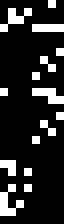

In [74]:
img_data = """
                dc.l $20050, $60008F, 0
                dc.l $10004, $20008, $8E, $30000, $10004, $20008, 0
                dc.l $C00050, $50, $8000A0
"""
flatten = lambda l: [ e for sublist in l for e in sublist]

longs = [l.strip().replace('$','').rjust(8,'0')
         for l in ','.join([l[21:] 
         for l in img_data.split('\n')[1:-1]]).split(',')]
bytes = flatten([["$"+l[:2],"$"+l[2:4],"$"+l[4:6],"$"+l[6:]] for l in longs])
bytes = bytes + ["$00","$C0"]
for i in range(0,len(bytes),8):
    print("dc.b  " + ','.join(bytes[i:i+8]))
    
width = 8
bytes = [bytes[i] for i in range(1,len(bytes),2)]
print(bytes)
cry_bytes = bytearray([int(x[1:],16) for x in bytes])
pixels = get1BitPixels(cry_bytes,width)

scale = 8
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=20, monochrome=True)
#print('\n'+''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))
img

## chev2

dc.b  $00,$02,$00,$50,$00,$60,$00,$81
dc.b  $00,$00,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$82
dc.b  $00,$03,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$00
dc.b  $00,$C0,$00,$50,$00,$00,$00,$50
dc.b  $00,$80,$00,$A0,$00,$C0
['$02', '$50', '$60', '$81', '$00', '$00', '$01', '$04', '$02', '$08', '$00', '$82', '$03', '$00', '$01', '$04', '$02', '$08', '$00', '$00', '$C0', '$50', '$00', '$50', '$80', '$A0', '$C0']


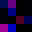

In [80]:
img_data = """
                dc.l $500060, $810000, $01, $40002, $80000, $820003, $01, $40002
                dc.l $80000, $C0, $500000, $500080, $A000C0
"""
flatten = lambda l: [ e for sublist in l for e in sublist]

longs = [l.strip().replace('$','').rjust(8,'0')
         for l in ','.join([l[21:] 
         for l in img_data.split('\n')[1:-1]]).split(',')]
bytes = flatten([["$"+l[:2],"$"+l[2:4],"$"+l[4:6],"$"+l[6:]] for l in longs])
bytes = ["$00","$02"] + bytes
for i in range(0,len(bytes),8):
    print("dc.b  " + ','.join(bytes[i:i+8]))
    
width = 4
bytes = [bytes[i] for i in range(1,len(bytes),2)]
print(bytes)
cry_bytes = bytearray([int(x[1:],16) for x in bytes])
pixels = getPixels(cry_bytes,width)

scale = 8
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=20, monochrome=True)
#print('\n'+''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))
img

## chev1

dc.b  $00,$02,$00,$50,$00,$60,$00,$F1
dc.b  $00,$00,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$F2
dc.b  $00,$03,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$00
dc.b  $00,$C0,$00,$50,$00,$00,$00,$50
dc.b  $00,$80,$00,$A0,$00,$C0
['$02', '$50', '$60', '$F1', '$00', '$00', '$01', '$04', '$02', '$08', '$00', '$F2', '$03', '$00', '$01', '$04', '$02', '$08', '$00', '$00', '$C0', '$50', '$00', '$50', '$80', '$A0', '$C0']


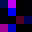

In [81]:
img_data = """
                dc.l $20050, $6000F1, 0
                dc.l $10004, $20008, $F2, $30000, $10004, $20008, 0
                dc.l $C00050, $50, $8000A0
"""
flatten = lambda l: [ e for sublist in l for e in sublist]

longs = [l.strip().replace('$','').rjust(8,'0')
         for l in ','.join([l[21:] 
         for l in img_data.split('\n')[1:-1]]).split(',')]
bytes = flatten([["$"+l[:2],"$"+l[2:4],"$"+l[4:6],"$"+l[6:]] for l in longs])
bytes = bytes + ["$00","$C0"] 
for i in range(0,len(bytes),8):
    print("dc.b  " + ','.join(bytes[i:i+8]))
    
width = 4
bytes = [bytes[i] for i in range(1,len(bytes),2)]
print(bytes)
cry_bytes = bytearray([int(x[1:],16) for x in bytes])
pixels = getPixels(cry_bytes,width)

scale = 8
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=20, monochrome=True)
#print('\n'+''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))
img

## chev5

dc.b  $00,$02,$00,$50,$00,$60,$00,$FE
dc.b  $00,$00,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$FD
dc.b  $00,$03,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$00
dc.b  $00,$C0,$00,$50,$00,$00,$00,$50
dc.b  $00,$80,$00,$A0,$00,$C0
['$02', '$50', '$60', '$FE', '$00', '$00', '$01', '$04', '$02', '$08', '$00', '$FD', '$03', '$00', '$01', '$04', '$02', '$08', '$00', '$00', '$C0', '$50', '$00', '$50', '$80', '$A0', '$C0']


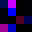

In [82]:
img_data = """
                dc.l $500060, $FE0000, $01, $40002, $80000, $FD0003, $01, $40002
                dc.l $80000, $C0, $500000, $500080, $A000C0
"""
flatten = lambda l: [ e for sublist in l for e in sublist]

longs = [l.strip().replace('$','').rjust(8,'0')
         for l in ','.join([l[21:] 
         for l in img_data.split('\n')[1:-1]]).split(',')]
bytes = flatten([["$"+l[:2],"$"+l[2:4],"$"+l[4:6],"$"+l[6:]] for l in longs])
bytes = ["$00","$02"] + bytes
for i in range(0,len(bytes),8):
    print("dc.b  " + ','.join(bytes[i:i+8]))
    
width = 4
bytes = [bytes[i] for i in range(1,len(bytes),2)]
print(bytes)
cry_bytes = bytearray([int(x[1:],16) for x in bytes])
pixels = getPixels(cry_bytes,width)

scale = 8
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=20, monochrome=True)
#print('\n'+''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))
img

## chev

dc.b  $00,$02,$00,$50,$00,$60,$00,$48
dc.b  $00,$00,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$49
dc.b  $00,$03,$00,$00,$00,$01,$00,$04
dc.b  $00,$02,$00,$08,$00,$00,$00,$00
dc.b  $00,$C0,$00,$50,$00,$00,$00,$50
dc.b  $00,$80,$00,$A0,$00,$C0
['$02', '$50', '$60', '$48', '$00', '$00', '$01', '$04', '$02', '$08', '$00', '$49', '$03', '$00', '$01', '$04', '$02', '$08', '$00', '$00', '$C0', '$50', '$00', '$50', '$80', '$A0', '$C0']


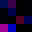

In [83]:
img_data = """
                dc.l $20050, $600048, 0
                dc.l $10004, $20008, $49, $30000, $10004, $20008, 0
                dc.l $C00050, $50, $8000A0
"""
flatten = lambda l: [ e for sublist in l for e in sublist]

longs = [l.strip().replace('$','').rjust(8,'0')
         for l in ','.join([l[21:] 
         for l in img_data.split('\n')[1:-1]]).split(',')]
bytes = flatten([["$"+l[:2],"$"+l[2:4],"$"+l[4:6],"$"+l[6:]] for l in longs])
bytes = bytes + ["$00","$C0"]
for i in range(0,len(bytes),8):
    print("dc.b  " + ','.join(bytes[i:i+8]))
    
width = 4
bytes = [bytes[i] for i in range(1,len(bytes),2)]
print(bytes)
cry_bytes = bytearray([int(x[1:],16) for x in bytes])
pixels = getPixels(cry_bytes,width)

scale = 8
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=20, monochrome=True)
#print('\n'+''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))
img

# Rough Work

In [87]:
0xFFFF

65535

In [84]:
avbank_raw = open("../src/vlm/font.dat",'r').read()
words = [l.strip().replace('$','')
         for l in ','.join(
             [l[14:] for l in avbank_raw.split('\n')[2:]  if "dc.w" in l]
         ).split(',')]
#longs = ["$"+words[i]+words[i+1] for i in range(0,len(words),2)]
for i in range(0,len(words),4):
    w = [str(int(w,16)) for w in words[i:i+4]]
    print('dc.w '+', '.join(w) + f' ; {i}')
    

dc.w 920, 1016, 1024, 1032 ; 0
dc.w 1040, 280, 280, 280 ; 4
dc.w 280, 280, 280, 280 ; 8
dc.w 280, 280, 280, 280 ; 12
dc.w 280, 280, 280, 280 ; 16
dc.w 280, 280, 280, 280 ; 20
dc.w 280, 280, 280, 280 ; 24
dc.w 280, 280, 280, 280 ; 28
dc.w 280, 304, 312, 320 ; 32
dc.w 328, 336, 344, 352 ; 36
dc.w 360, 368, 376, 384 ; 40
dc.w 392, 400, 408, 416 ; 44
dc.w 424, 432, 440, 448 ; 48
dc.w 456, 464, 472, 480 ; 52
dc.w 488, 496, 928, 280 ; 56
dc.w 296, 280, 288, 280 ; 60
dc.w 280, 712, 720, 728 ; 64
dc.w 736, 744, 752, 760 ; 68
dc.w 768, 776, 784, 792 ; 72
dc.w 800, 808, 816, 824 ; 76
dc.w 832, 840, 848, 856 ; 80
dc.w 864, 872, 880, 888 ; 84
dc.w 896, 904, 912, 280 ; 88
dc.w 280, 280, 280, 280 ; 92
dc.w 280, 504, 512, 520 ; 96
dc.w 528, 536, 544, 552 ; 100
dc.w 560, 568, 576, 584 ; 104
dc.w 592, 600, 608, 616 ; 108
dc.w 624, 632, 640, 648 ; 112
dc.w 656, 664, 672, 680 ; 116
dc.w 688, 696, 704, 280 ; 120
dc.w 280, 280, 280, 280 ; 124
dc.w 936, 944, 952, 960 ; 128
dc.w 968, 976, 984, 992 ; 132
dc.w

In [86]:
avbank_raw = open("../src/vlm/font.dat",'r').read()
longs = [l.strip().replace('$','').rjust(8,'0')
         for l in ','.join(
             [l[14:] for l in avbank_raw.split('\n')[4:]   if "dc.l" in l]
         ).split(',')]
for i in range(0,len(longs),2):
    print('dc.l $'+', $'.join(longs[i:i+2]) + f' ; {280+(i*4)}')


dc.l $20100804, $04081020 ; 280
dc.l $04081020, $20100804 ; 288
dc.l $20202020, $20000020 ; 296
dc.l $50505000, $00000000 ; 304
dc.l $4848FE48, $48FE4848 ; 312
dc.l $107E9070, $1014FE20 ; 320
dc.l $60620408, $10204C8C ; 328
dc.l $20508870, $64989A64 ; 336
dc.l $00102040, $00000000 ; 344
dc.l $10204040, $40402010 ; 352
dc.l $20100808, $08081020 ; 360
dc.l $00925438, $38549200 ; 368
dc.l $101010FE, $10101000 ; 376
dc.l $00000000, $00101020 ; 384
dc.l $000000FE, $00000000 ; 392
dc.l $00000000, $00606000 ; 400
dc.l $00020408, $10204080 ; 408
dc.l $7C82868A, $92A2C27C ; 416
dc.l $10305010, $101010FE ; 424
dc.l $78840408, $102040FE ; 432
dc.l $7C820204, $7C02827C ; 440
dc.l $040C1424, $4484FE04 ; 448
dc.l $FE8080FC, $0202827C ; 456
dc.l $384080FC, $8282827C ; 464
dc.l $FE020408, $10204080 ; 472
dc.l $7C82827C, $8282827C ; 480
dc.l $7C828282, $7E02827C ; 488
dc.l $0000007C, $027E827E ; 496
dc.l $808080FC, $828282FC ; 504
dc.l $0000007E, $8080807E ; 512
dc.l $0202027E, $8282827E ; 520
dc.l $00

In [2]:
flatten = lambda l: [ e for sublist in l for e in sublist]
avbank_raw = open("../src/vlm/sympad.dat",'r').read()
bs = [int(l.strip().replace('$',''),16)
         for l in ','.join(
             [l[21:] for l in avbank_raw.split('\n')]
         ).split(',') if l != '']
open("../src/vlm/sympad.o",'wb').write(bytes(bs))

516

In [32]:
0x5e48-0x5e20

40

In [28]:
hex(0x1e8054 - 0x192000)

'0x56054'